feature= sex  used as predictor
Coefficients: 0.249
Intercept:  0.999
Mean squared error: 0.26
Mean absolute error: 0.44
R2: 0.004


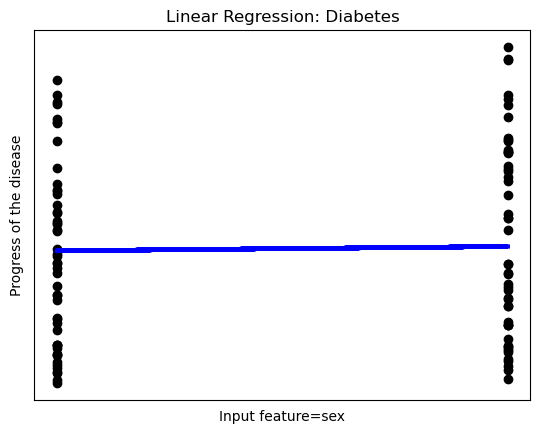

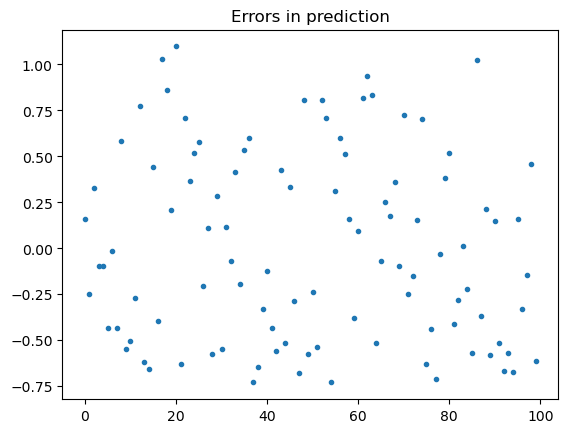

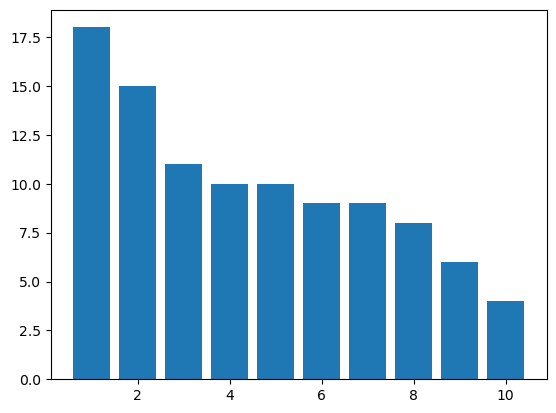

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn.feature_selection import f_regression


def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

#diabetes.feature_names
#['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
#diabes.DESCR
#bp= blood presure, and 6 blood serum movements
#predict: disease progressing one year after base line


# Preprocessing Steps
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

#number of samples
nSamples=diabetes.data.shape[0]

# number of testing data
nTest=100

# Use only one feature as predictor
featureNumber=1

print('feature=', diabetes.feature_names[featureNumber], ' used as predictor')
diabetes_X = diabetes.data[:, featureNumber].reshape(-1,1)

#diabetes_X, diabetes.target = unison_shuffled_copies(diabetes_X, diabetes.target)

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-nTest]
diabetes_X_test = diabetes_X[-nTest:]

#normalize target data
diabetes_target=diabetes.target/np.mean(diabetes.target.reshape(-1,1))
#diabetes_target=diabetes.target

# Split the targets into training/testing sets
diabetes_y_train = diabetes_target[:-nTest]
diabetes_y_test = diabetes_target[-nTest:]




# Regression
# Create linear regression object
regr = linear_model.LinearRegression()


# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)


# The coefficients
print ('Coefficients:', round(regr.coef_[0],3))
print  ('Intercept: ', round(regr.intercept_,3))
# The mean squared error
print ("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print ("Mean absolute error: %.2f" % mean_absolute_error(diabetes_y_test, diabetes_y_pred))
r2=r2_score(diabetes_y_test, diabetes_y_pred)
print ("R2:", round(r2,3))




#f-statistic
#f=f_regression( diabetes_X_test, diabetes_y_test)

# Plot outputs
plt.figure(1)
plt.title('Linear Regression: Diabetes')
plt.ylabel('Progress of the disease')
plt.xlabel('Input feature='+diabetes.feature_names[featureNumber])
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())


errors = (diabetes_y_test - diabetes_y_pred)

plt.figure(3)
plt.title('Errors in prediction')
plt.plot(errors,'.')
#plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)




#Plot a histogram of errors
plt.figure(4)
res=np.histogram(errors)
plt.bar(np.arange(1,len(res[0])+1), res[0])

plt.show()



In [2]:
diabetes


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59